# Table of contents:

1. Raw Data Preparation
2. Data Structure
3. DFI Calculation
4. Cluster Analysis

# 1. Raw Data Preparation

### Raw Data Preparation and Creation of Excel Tables for Each Measurement Station

Gauge Stations Data: https://wasserportal.rlp-umwelt.de/auskunftssysteme/analysen-und-messwerte

Supplementary Information to each Gauge Stations: (https://hochwasser.rlp.de/pegelliste)

In [ ]:
import os
import pandas as pd

# Pfade für Eingabe und Ausgabe 
code_verzeichnis = os.path.dirname(__file__)
eingabe_verzeichnis = os.path.join(code_verzeichnis, '..', 'backups', 'rohdaten')
ausgabeverzeichnis = os.path.join(code_verzeichnis, '..', 'backups', 'rohdaten_messstellen')

# Sicherstellen, dass das Ausgabeverzeichnis vorhanden ist
os.makedirs(ausgabeverzeichnis, exist_ok=True)

# Dateinamen der Excel-Dateien
dateinamen = [
    'messwerte0091712845421539.xlsx',
    'messwerte0091712845515757.xlsx',
    'messwerte0091712845558099.xlsx',
    'messwerte0091712845607081.xlsx',
    'messwerte0091712845650709.xlsx'
]


gewünschte_spalten = ['Messst-Nr', 'Messstelle', 'Rechtswert', 'Hochwert', 'Datum', 'Wert']

# Für jede Excel-Datei filtern und in separaten Dateien speichern
for dateiname in dateinamen:
    # Vollständigen Dateipfad zur aktuellen Excel-Datei erstellen
    excel_dateipfad = os.path.join(eingabe_verzeichnis, dateiname)
    
    # Excel-Datei einlesen
    df = pd.read_excel(excel_dateipfad)
    
    # Spalten auswählen
    df = df[gewünschte_spalten]
    
    # Messstellen identifizieren
    messstellen = df['Messstelle'].unique()
    
    # Für jede Messstelle eine separate Excel-Tabelle erstellen
    for messstelle in messstellen:
        # Daten für die aktuelle Messstelle filtern
        messstelle_df = df[df['Messstelle'] == messstelle]
        
        # Den Dateinamen für die neue Excel-Tabelle erstellen
        neuer_dateiname = os.path.join(ausgabeverzeichnis, f'abfluss_{messstelle.lower()}.xlsx')
        
        # Abflussdaten in neue Excel-Tabelle speichern
        messstelle_df.to_excel(neuer_dateiname, index=False)

print("Vorgang abgeschlossen.")

Intermediate step: Review new Excel files: Manually change filenames that contain "." as my attempt to automate this did not work with periods. There aren't many. 


### Formatting the data: all lowercase, change special characters, and replace spaces in the filename.

In [ ]:
import os
import pandas as pd

def replace_special_characters(text):
    # Ersetze Sonderzeichen
    text = text.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue').replace('ß', 'ss').replace(' ', '_').replace('-', '_')
    return text.lower()

def process_data(input_file, output_file):
    # Lese die xlsx-Datei
    df = pd.read_excel(input_file)
    
    # Ersetze Sonderzeichen in den Spaltennamen
    df.columns = [replace_special_characters(column) for column in df.columns]
    
    # Ersetze Sonderzeichen in den Daten
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].apply(replace_special_characters)
    
    # Schreibe die bearbeiteten Daten zurück in eine xlsx-Datei
    df.to_excel(output_file, index=False)

# Verzeichnis des Codes
code_verzeichnis = os.path.dirname(__file__)

# Verzeichnis mit den Dateien
directory = os.path.join(code_verzeichnis, '..', 'backups', 'rohdaten_messstellen')

# Gehe durch alle Dateien im Verzeichnis
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)) and filename.endswith('.xlsx'):
        input_file = os.path.join(directory, filename)
        output_file = os.path.join(directory, filename.lower())

        process_data(input_file, output_file)

print("Die Daten wurden erfolgreich bearbeitet.")

### Set date format.

In [ ]:
import os
import pandas as pd

# Verzeichnis des Codes
code_verzeichnis = os.path.dirname(__file__)

# Verzeichnis mit den Excel-Dateien
input_directory = os.path.join(code_verzeichnis, '..', 'backups', 'rohdaten_messstellen')

# Verzeichnis zum Speichern der bearbeiteten Excel-Dateien
output_directory = os.path.join(code_verzeichnis, '..', 'backups', 'rohdaten_messstellen')

# Liste der Dateien im Eingabeverzeichnis
file_list = os.listdir(input_directory)

# Schleife über jede Excel-Datei
for file_name in file_list:
    if file_name.endswith('.xlsx'):
        # Vollständiger Pfad zur aktuellen Excel-Datei
        input_file_path = os.path.join(input_directory, file_name)
        
        # Einlesen der Excel-Datei
        df = pd.read_excel(input_file_path)
        
        # Ändern des Datumsformats
        df['datum'] = pd.to_datetime(df['datum']).dt.strftime('%d.%m.%Y')
        
        # Vollständiger Pfad zum Speichern der bearbeiteten Excel-Datei
        output_file_path = os.path.join(output_directory, file_name)
        
        # Speichern der bearbeiteten Excel-Datei
        df.to_excel(output_file_path, index=False)

print("Vorgang abgeschlossen.")

# 2. Data Structure

### Creating an Overview Table with Information on All Measurement Stations which will be used for statistical analysis.

In [ ]:
import os
import pandas as pd

# Verzeichnis festlegen
verzeichnis = "../backups/rohdaten_messstellen"

# Liste zum Speichern der extrahierten Daten erstellen
datenliste = []

# Durch alle Dateien im Verzeichnis iterieren
for datei in os.listdir(verzeichnis):
    if datei.endswith('.xlsx'):
        # Pfad zur aktuellen Datei erstellen
        dateipfad = os.path.join(verzeichnis, datei)
        
        # Daten aus der Excel-Datei lesen
        df = pd.read_excel(dateipfad)
        
        # Gewünschte Informationen extrahieren und zur Liste hinzufügen
        messst_nr = df['messst_nr'].iloc[0]  # Annahme: Messst-Nr ist in der ersten Zeile
        messst_name = df['messstelle'].iloc[0]  # Annahme: Messstelle ist in der ersten Zeile
        rechtswert = df['rechtswert'].iloc[0]  # Annahme: Rechtswert ist in der ersten Zeile
        hochwert = df['hochwert'].iloc[0]  # Annahme: Hochwert ist in der ersten Zeile
        
        # Erster und letzter Wert der Spalte "Datum" hinzufügen
        erstes_datum = df['datum'].min()
        letztes_datum = df['datum'].max()
        
        # Informationen zur Liste hinzufügen
        datenliste.append([messst_nr, messst_name, rechtswert, hochwert, erstes_datum, letztes_datum])

# Übersichtstabelle erstellen
datenframe = pd.DataFrame(datenliste, columns=['messst-Nr', 'messstelle', 'rechtswert', 'hochwert', 'erstes_datum', 'letztes_datum'])

# Pfad zur Ausgabedatei festlegen
ausgabepfad = "../backups/overview_messstellen.xlsx"

# Übersichtstabelle als Excel-Datei speichern
datenframe.to_excel(ausgabepfad, index=False)

print("Übersichtstabelle wurde erstellt:", ausgabepfad)

## Preparation for DFI: 

Conversion from m³/s to l/s/km² (Normalization for comparing the relative hydrological responses of the catchments).

In [ ]:
import pandas as pd
import os

# Aktuelles Verzeichnis des Skripts
code_directory = os.path.dirname(__file__)

# Pfad zum Ordner mit den "abfluss"-Tabellen
abfluss_directory = os.path.join(code_directory, '..', '1_abfluss')

# Durchlaufen jeder "abfluss"-Tabelle:
for file_name in os.listdir(abfluss_directory):
    if file_name.startswith("abfluss") and file_name.endswith(".xlsx"):
        # Excel-Tabelle laden
        abfluss_file_path = os.path.join(abfluss_directory, file_name)
        abfluss_data = pd.read_excel(abfluss_file_path)
        
        # Neue Spalte mit berechneten Werten hinzufügen
        abfluss_data['abfluss_norm_m3skm2'] = abfluss_data['wert'] / abfluss_data['area']
        abfluss_data['abfluss_norm_lskm2'] = (abfluss_data['wert'] / abfluss_data['area']) * 1000

        # Speichern der aktualisierten "abfluss"-Tabelle
        updated_file_path = os.path.join(abfluss_directory, file_name)
        abfluss_data.to_excel(updated_file_path, index=False)

# 3. DFI Calculation: 

### Loop over all discharge Files with n=360 
CDCs of all Measurement Stations

In [ ]:
# Laden der benötigten Pakete
library(readxl)
library(delayedflow)
library(openxlsx)

# Verzeichnis, in dem sich die XLSX-Dateien befinden
input_verzeichnis <- "E:\Masterarbeit_Luna_Schneider\1_daten\1_abfluss"

# Verzeichnis, in das die bearbeiteten Dateien exportiert werden sollen
output_verzeichnis <- "E:\Masterarbeit_Luna_Schneider\1_daten\2_dfi"

# Liste aller Dateien im Eingabe-Verzeichnis
alle_dateien <- list.files(path = input_verzeichnis, pattern = "\\.xlsx$", full.names = TRUE)

# Schleife durch alle Dateien
for (datei in alle_dateien) {
  # Überprüfen, ob die Datei keine temporäre Excel-Datei ist und ob sie eine gültige Excel-Datei ist
  if (!grepl("~$", basename(datei)) & file.info(datei)$size > 0) {
    print(paste("Verarbeite Datei:", datei))  # Debug-Ausgabe
    
    # Versuche, die Datei einzulesen
    tryCatch({
      # Datei einlesen
      excel_data <- read_excel(datei)
      
      # Hier deine Datenbearbeitungsschritte mit delayedflow durchführen
      # Beispiel:
      bearbeitete_spalte <- dfi_n(excel_data$abfluss_norm_lskm2, n = 1:360)
      
      # Dateinamen für die Ausgabedatei
      output_datei_name <- paste0("dfi_", basename(datei))
      
      # Pfad zur Ausgabedatei
      output_pfad <- file.path(output_verzeichnis, output_datei_name)
      
      # Speichern der bearbeiteten Spalte als separate Excel-Datei
      write.xlsx(data.frame(bearbeitete_spalte), output_pfad, rowNames = FALSE)
      
      print(paste("Bearbeitete Datei gespeichert unter:", output_pfad))  # Debug-Ausgabe
    }, error = function(e) {
      print(paste("Fehler beim Lesen der Datei:", datei))  # Debug-Ausgabe
      print(e)  # Debug-Ausgabe
    })
  }
}

##### JOIN aller CDCs

In [ ]:
import os
import pandas as pd

# Aktuelles Verzeichnis des Skripts
code_directory = os.path.dirname(__file__)

# Pfad zum Ordner mit den "abfluss"-Tabellen
verzeichnis  = os.path.join(code_directory, '..', '2_dfi')


# Liste aller Dateien im Verzeichnis
alle_dateien = [os.path.join(verzeichnis, datei) for datei in os.listdir(verzeichnis) if datei.endswith('.xlsx')]

# DataFrame erstellen, um Daten aus allen Dateien zu kombinieren
alle_daten = pd.DataFrame()

# Schleife durch alle Dateien
for datei in alle_dateien:
    # Datei einlesen
    df = pd.read_excel(datei)
    
    # Spalten umbenennen, um Dateinamen ohne Präfix zu speichern
    dateiname = os.path.splitext(os.path.basename(datei))[0].replace("dfi_abfluss_", "")
    spalten = {spalte: f"dfi_{dateiname}" if spalte != "n" else spalte for spalte in df.columns}
    df = df.rename(columns=spalten)
    
    # Daten zum kombinierten DataFrame hinzufügen
    alle_daten = pd.concat([alle_daten, df.iloc[:, 1:]], axis=1)  # Die erste Spalte ("n") nur einmal behalten

# Ergebnis in eine Excel-Datei schreiben
ausgabepfad = "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/1_daten/2_dfi"


ausgabedatei = os.path.join(ausgabepfad, "dfi_join.xlsx")
alle_daten.to_excel(ausgabedatei, index=False)

print(f"Die kombinierten Daten wurden erfolgreich unter {ausgabedatei} gespeichert.")

#### DFI Transponieren

In [ ]:
import pandas as pd

# Daten einlesen
dfi_data = pd.read_excel(r'E:\Masterarbeit_Luna_Schneider\2_ergebnisse\1_dfi\dfi_join_messstelle.xlsx', index_col=0)

# Transponieren der Daten
df_transposed = dfi_data.transpose()

# Speichern der transponierten Daten als Excel-Datei
output_file_path = r'E:\Masterarbeit_Luna_Schneider\2_ergebnisse\1_dfi\dfi_transposed.xlsx'
df_transposed.to_excel(output_file_path)

print("Transponierte Daten erfolgreich als Excel-Datei gespeichert.")

For each measurement point, a catchment area hierarchy was created based on its location to filter the data effectively and avoid errors during aggregation. This is named *ezg_hierarchie.xlsx* and contains other information that can be used for the localization of individual measurement points.

#### Column = =gebiet_id -> add transposed dfi calculation

In [ ]:
import pandas as pd

# Pfade zu den Excel-Dateien
ezg_hierarchie_pfad = r'E:\Masterarbeit_Luna_Schneider\1_daten\1_daten\4_geodaten\QGIS_Masterarbeit\Arbeitsordner\dateien_fuer_merge\ezg_hierarchie.xlsx'
dfi_transposed_pfad = r'E:\Masterarbeit_Luna_Schneider\1_daten\2_dfi\dfi_transposed.xlsx'
ausgabe_pfad = r'E:\Masterarbeit_Luna_Schneider\1_daten\2_dfi\dfi_transposed_mit_gebiet_id.xlsx'

# Einlesen der Excel-Dateien
ezg_hierarchie_df = pd.read_excel(ezg_hierarchie_pfad)
dfi_transposed_df = pd.read_excel(dfi_transposed_pfad)

# Nur die Spalte "gebiet_id" und "messstelle" aus ezg_hierarchie_df extrahieren
ezg_hierarchie_df = ezg_hierarchie_df[['messstelle', 'gebiet_id', 'ezg_name', 'ezg_fluss']]

# Verknüpfung der Datenframes basierend auf der Spalte "messstelle"
merged_df = pd.merge(dfi_transposed_df, ezg_hierarchie_df, on='messstelle', how='left')

# Speichern des resultierenden DataFrames in eine neue Excel-Datei
merged_df.to_excel(ausgabe_pfad, index=False)

print("Vorgang abgeschlossen.")


## Figure: CDCs for all Catchments

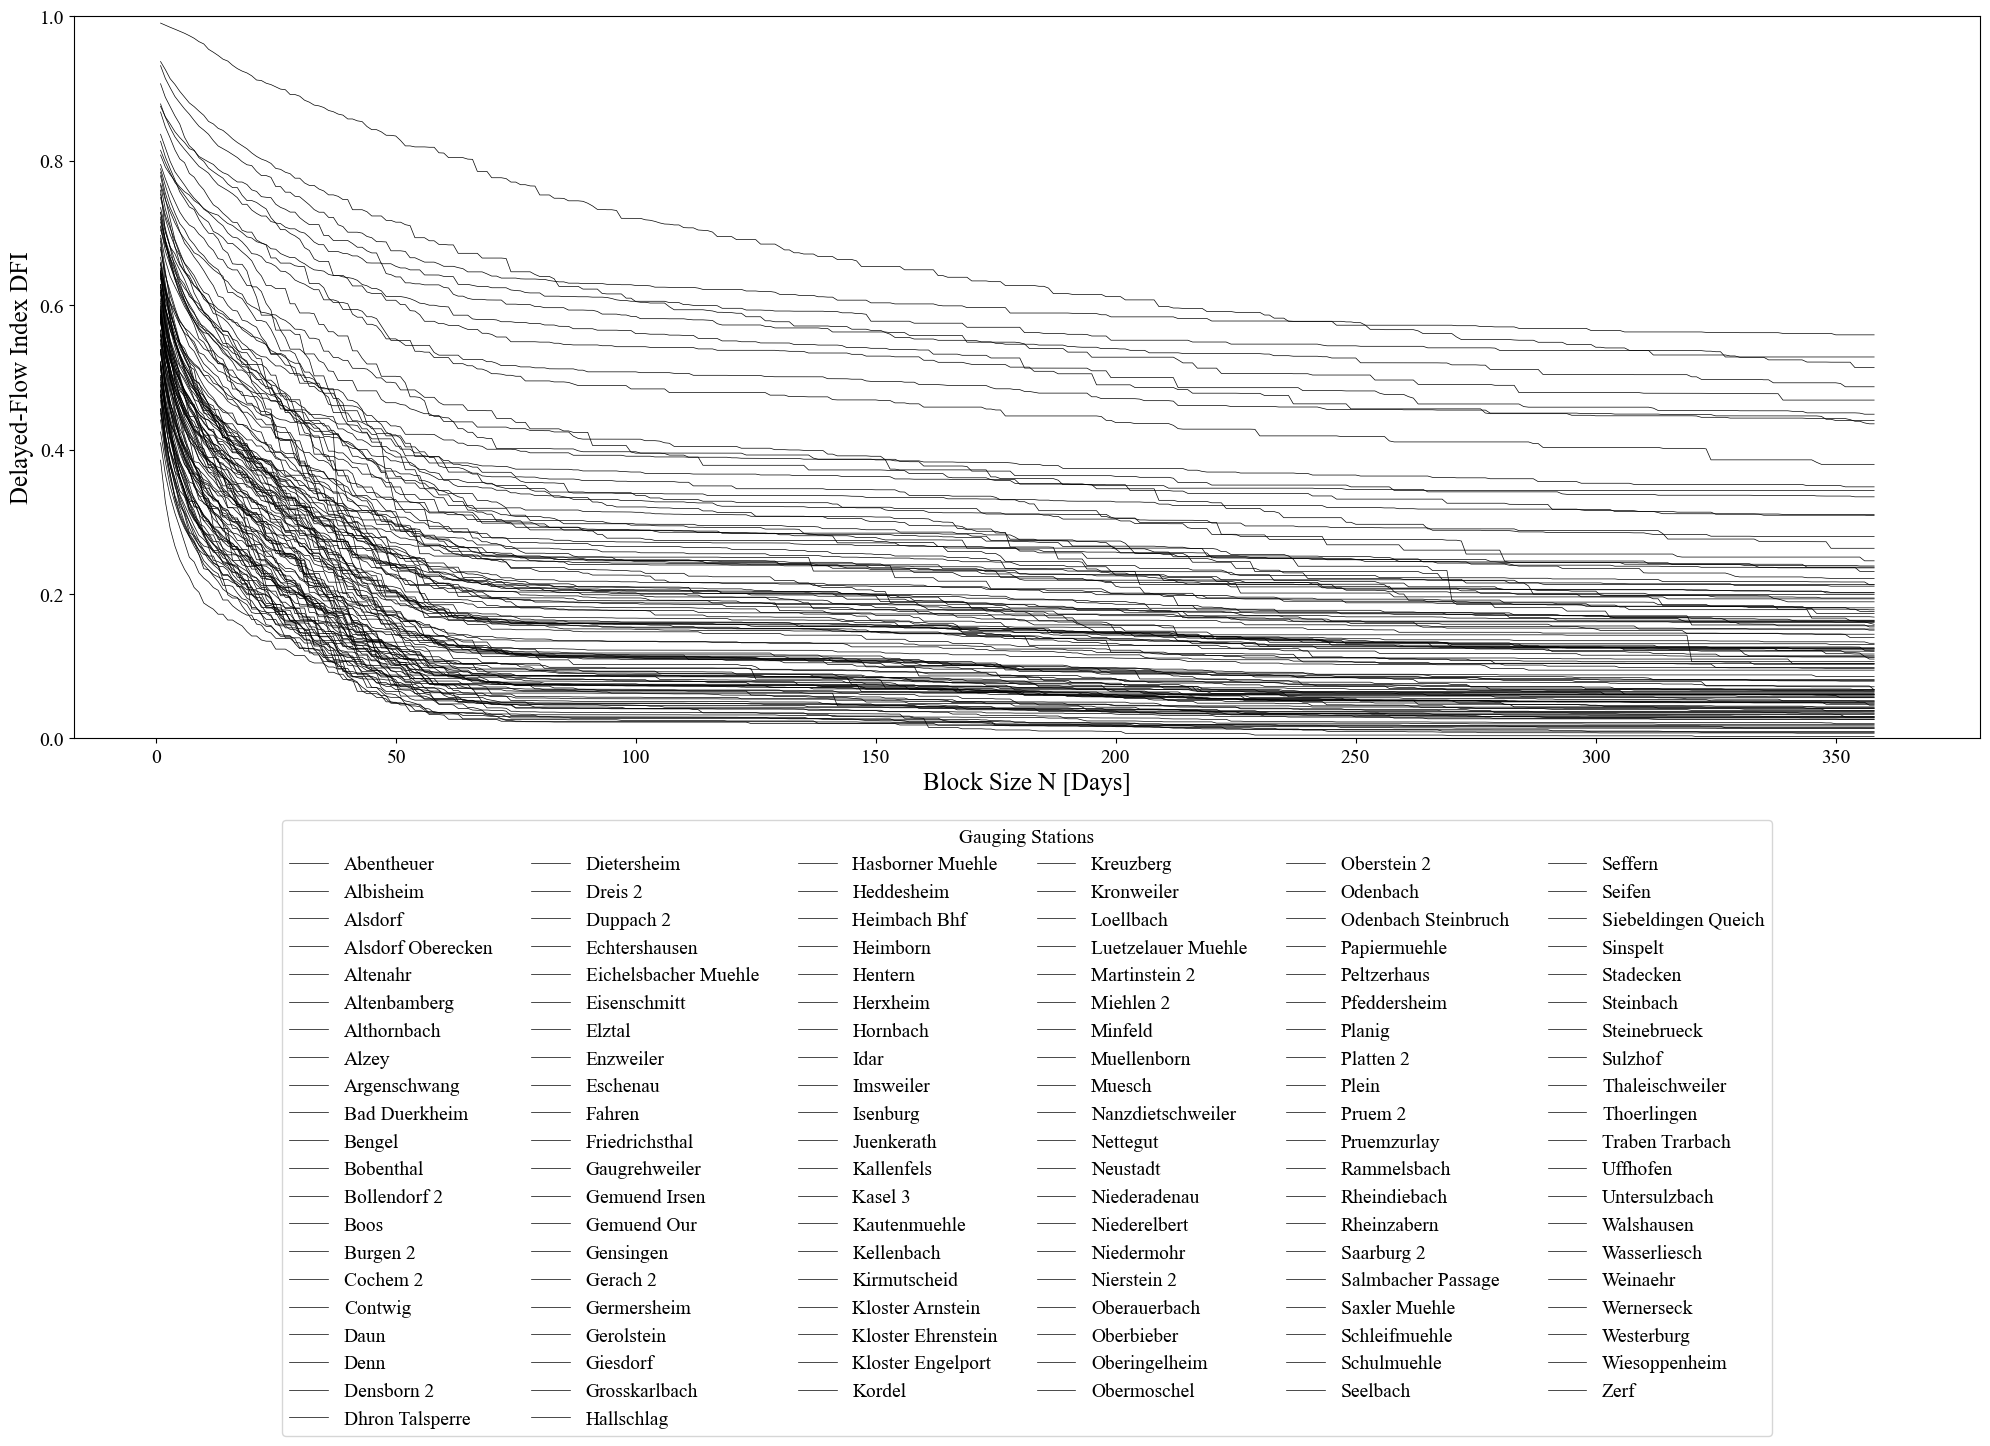

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zur Datei
file_path = r'E:\Masterarbeit_Luna_Schneider\1_daten\codes\dfi_transposed_mit_gebiet_id_cluster.xlsx'

# Laden der Daten
df = pd.read_excel(file_path)

# Sortieren der Messstellen
sorted_df = df.sort_values(by=['messstelle'])

# Messstellennamen anpassen, sodass der erste Buchstabe groß ist und Unterstriche durch Leerzeichen ersetzt werden
sorted_df['messstelle'] = sorted_df['messstelle'].str.replace('_', ' ').str.title()

# Plot erstellen
plt.figure(figsize=(20, 15))  # Vergrößern der Abbildungsfläche

# Setze die Schriftart auf Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Iteration über jede Messstelle in df
for idx, row in sorted_df.iterrows():
    # Extrahieren der DFI-Werte für die aktuelle Messstelle
    dfi_values = row.iloc[4:].values  # Die ersten vier Spalten sind 'messstelle', 'gebiet_id', 'cluster' und 'ezg_name', daher ignorieren wir sie
    messstelle = row['messstelle']
    # Sicherstellen, dass nur numerische Werte geplottet werden
    dfi_values = pd.to_numeric(dfi_values, errors='coerce')
    plt.plot(range(1, len(dfi_values) + 1), dfi_values, color='black', label=f"{messstelle}", linewidth=0.5)

# Achsenbeschriftungen hinzufügen
plt.xlabel('Block Size N [Days]', fontsize=18)
plt.ylabel('Delayed-Flow Index DFI', fontsize=18)

# Titel hinzufügen
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Grenzen der y-Achse setzen
plt.ylim(0, 1)

# Legende außerhalb des Plots anzeigen und in mehr Spalten organisieren
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), title='Gauging Stations', fontsize=14, title_fontsize=14, ncol=6)  # Mehr Spalten verwenden

# Layout anpassen
plt.tight_layout()


# Plot speichern mit hoher Auflösung (800 dpi) im PNG-Format
# plt.savefig(r'E:\Masterarbeit_Luna_Schneider\2_ergebnisse\DFI_all_catchments.png', dpi=800, format='png')
plt.savefig('C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/Abbildungen/4.1_DFI_all_catchments.svg', format='svg')

# Plot anzeigen
plt.show()


# 4. Cluster Analysis

This code reads the DFI data from the Excel file, transposes the DataFrame to have the catchment areas as rows and the time points as columns.

It then performs hierarchical clustering using the "average method" and the "Euclidean metric," and subsequently creates a dendrogram to visualize the hierarchical structure of the clusters.

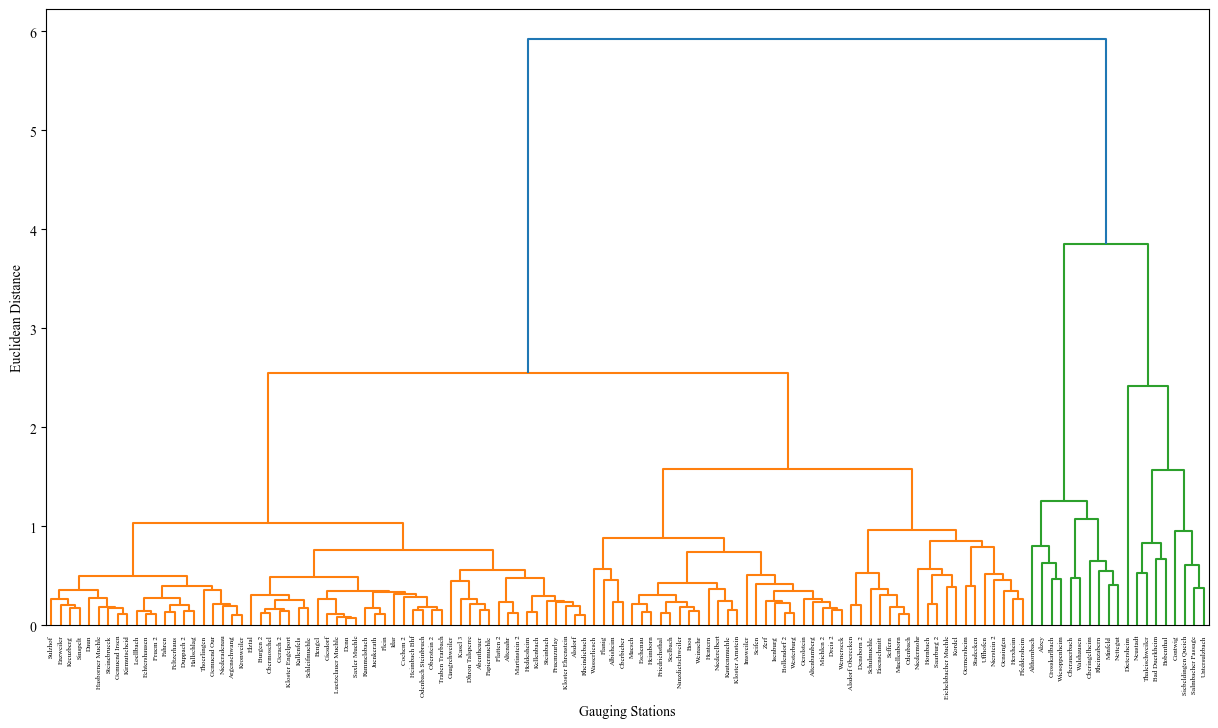

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Daten aus der Excel-Datei laden
file_path = "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/1_daten/3_clusteranalyse/dfi_join.xlsx"
df = pd.read_excel(file_path)

# Transponieren des DataFrames, um Messstellen als Zeilen und Zeitpunkte als Spalten zu haben
df_transposed = df.T

# Messstellennamen anpassen, sodass der erste Buchstabe groß ist und Unterstriche durch Leerzeichen ersetzt werden
df_transposed.index = df_transposed.index.str.replace('_', ' ').str.title()

# Hierarchisches Clustering durchführen
linkage_matrix = linkage(df_transposed, method='average', metric='euclidean')

# Schriftart auf Times New Roman setzen
plt.rcParams['font.family'] = 'Times New Roman'

# Dendrogramm erstellen
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=df_transposed.index, leaf_rotation=90)
plt.title('')
plt.xlabel('Gauging Stations', fontsize=10)
plt.ylabel('Euclidean Distance', fontsize=10)

# Speichern der Abbildung im PNG-Format mit 800 DPI
plt.savefig('C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/dendrogram.svg', format='svg')
plt.show()



### Dendrogramm Beschreibung:
The dendrogram displayed in the figure represents the hierarchical clustering of gauging stations based on their delayed-flow index (DFI) values. The x-axis shows the names of the gauging stations, with underscores replaced by spaces and the first letter capitalized for readability. The y-axis represents the Euclidean distance, which measures the dissimilarity between clusters.

Key Points:
Clustering Method: The hierarchical clustering was performed using the average linkage method with Euclidean distance as the metric.
Gauging Stations: The gauging stations are listed along the x-axis. Each station name has been formatted for better readability.
Cluster Formation: The dendrogram shows how the gauging stations are progressively merged into clusters based on their similarity in DFI values. The height of the branches indicates the level of dissimilarity (Euclidean distance) at which the clusters are joined.

Interpretation: Stations that are joined at lower heights (shorter branches) are more similar to each other compared to those joined at higher heights (longer branches).
The dendrogram provides a visual representation of the relationships between the gauging stations, helping to identify clusters of stations with similar flow characteristics.

### Determining the Optimal Number of Clusters:
To determine the optimal number of clusters, the Elbow Method was employed. The Elbow Method involves plotting the sum of squared distances (SSD) against the number of clusters. The point at which the plot starts to flatten, resembling an elbow, indicates the optimal number of clusters.

From the Elbow Method plot, it can be observed that the curve begins to flatten after 4 clusters. This point, where the decrease in SSD becomes less pronounced, suggests that 4 clusters is a suitable choice. Consequently, the decision was made to use 4 clusters for further analysis, as this number balances the need for a detailed clustering with the efficiency of interpretation.

By using 4 clusters, we can effectively group the gauging stations into categories that reflect their similarities in flow characteristics, facilitating a more nuanced understanding and analysis of the data.

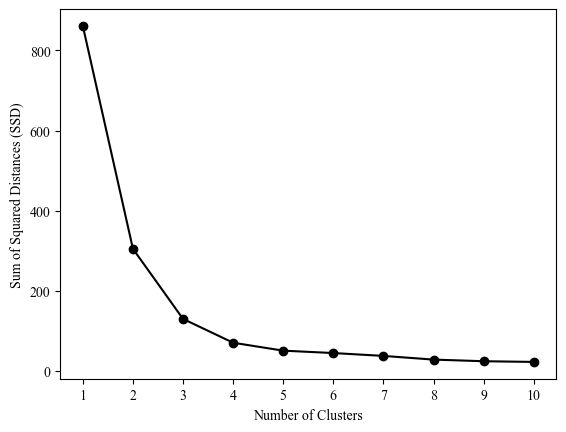

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dateipfad zur Excel-Datei
file_path = r'C:\Users\Lenovo\Documents\Masterarbeit\Masterarbeit\2_ergebnisse\1_dfi\dfi_join.xlsx'

# Daten aus der Excel-Datei laden
df = pd.read_excel(file_path)

# Transponieren des DataFrames, um Messstellen als Zeilen und Zeitpunkte als Spalten zu haben
df_transposed = df.T

# Durchführung der Clusteranalyse mit K-Means und Berechnung der Sum of Squared Distances (SSD) für verschiedene Anzahlen von Clustern
ssd = []
cluster_range = range(1, 11)  # Anzahl der Cluster von 1 bis 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transposed)
    ssd.append(kmeans.inertia_)

# Plotten der SSD gegen die Anzahl der Cluster
# Elbow Method to Determine the Optimal Number of Clusters
plt.plot(cluster_range, ssd, marker='o', linestyle='-', color= 'black')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('')
plt.xticks(np.arange(1, 11, 1))
plt.grid(False)  # Disable the grid
plt.savefig('C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/elbow_method_clusters.svg', format='svg')
plt.show()


## Cluster Reclass

After determining the number of clusters to be 4 using the previously employed methods, the cluster numbers were reclassified to provide a more logical view in the figures. The reclassification was done as follows:

reclass = {2: 1, 3: 2, 4: 3, 1: 4}


Festlegung der Farben je cluster: 
colorblind_palette = sns.color_palette("colorblind")
selected_colors = [colorblind_palette[i] for i in [0, 1, 2, 3]]  # Blau, Orange, Grün, Rot

Blau (#0072B2)
Orange (#E69F00)
Grün (#009E73)
Rot (#D55E00)

## Fig. Cluster Analysis based on the DFI of the Gauging Stations

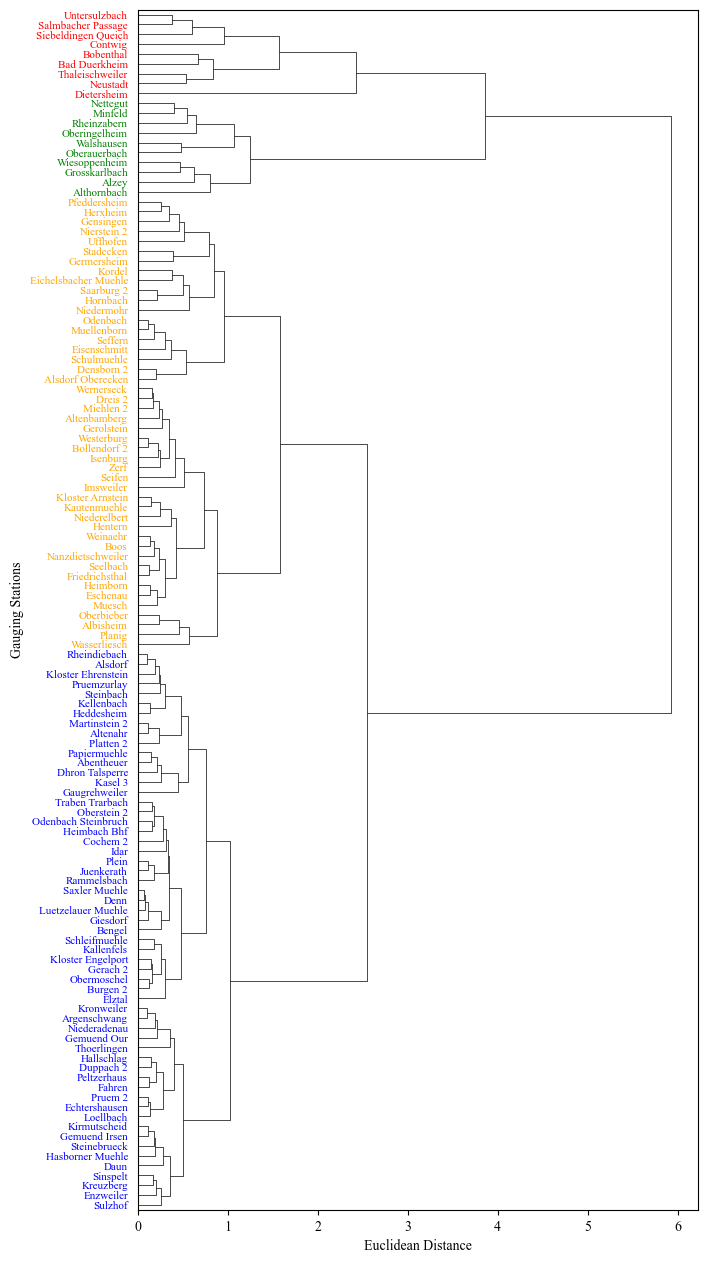

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Farben für die Cluster
cluster_colors = ['blue', 'orange', 'green', 'red']

# Daten aus der Excel-Datei laden
file_path = "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/1_daten/3_clusteranalyse/dfi_join.xlsx"
df = pd.read_excel(file_path)

# Transponieren des DataFrames, um Messstellen als Zeilen und Zeitpunkte als Spalten zu haben
df_transposed = df.T

# Messstellennamen anpassen, sodass der erste Buchstabe groß ist und Unterstriche durch Leerzeichen ersetzt werden
df_transposed.index = df_transposed.index.str.replace('_', ' ').str.title()

# Hierarchisches Clustering durchführen
linkage_matrix = linkage(df_transposed, method='average', metric='euclidean')

# Clusterzuordnung basierend auf der geladenen Clusterinformation
file_path_clusters = "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/merged_hierarchie_overview_updated.xlsx"
df_clusters = pd.read_excel(file_path_clusters)

# Sicherstellen, dass die Messstellennamen konsistent sind
df_clusters['messstelle'] = df_clusters['messstelle'].str.replace('_', ' ').str.title()

# Clusterzuordnung basierend auf der geladenen Clusterinformation
cluster_mapping = df_clusters.set_index('messstelle')['cluster'].to_dict()
label_colors = {label: cluster_colors[cluster_mapping[label] - 1] for label in df_transposed.index}

# Dendrogramm erstellen mit farbigen Labels
fig, ax = plt.subplots(figsize=(8, 15))  # Hochkant
dend = dendrogram(linkage_matrix, labels=df_transposed.index, leaf_rotation=0, leaf_font_size=10, orientation='right', color_threshold=0, above_threshold_color='black')

# Feinere Linien setzen
for i in ax.collections:
    i.set_linewidth(0.5)

# Farbige Labels anwenden
ax = plt.gca()
ylbls = ax.get_ymajorticklabels()
for lbl in ylbls:
    if lbl.get_text() in label_colors:
        lbl.set_color(label_colors[lbl.get_text()])
    lbl.set_fontsize(8)  # Schriftgröße der Messstellennamen anpassen
#Cluster Analysis of Gauging Stations
plt.title('', fontsize=15)
plt.xlabel('Euclidean Distance', fontsize=10)
plt.ylabel('Gauging Stations', fontsize=10)

# Ränder anpassen, um weniger Leerraum zu haben
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # Ränder anpassen

# Speichern der Abbildung im SVG-Format
#plt.savefig('C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/dendrogram_vertical.svg', format='svg')
#plt.savefig('C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/3_arbeitsordner/dendrogram_vertical.png', format='png', dpi=1600)
plt.show()


## CDCs by Cluster --> ges_ezg
With the determination of the clusters and their reclassification, it is now possible to represent the characteristic delayed-flow curves (CDCs) according to their cluster affiliation.
To avoid duplication and aggregation of data, only the "overall catchment areas" were selected from the data without considering the sub-catchment areas.
Based on this foundation, the various landscape characteristics were analyzed.


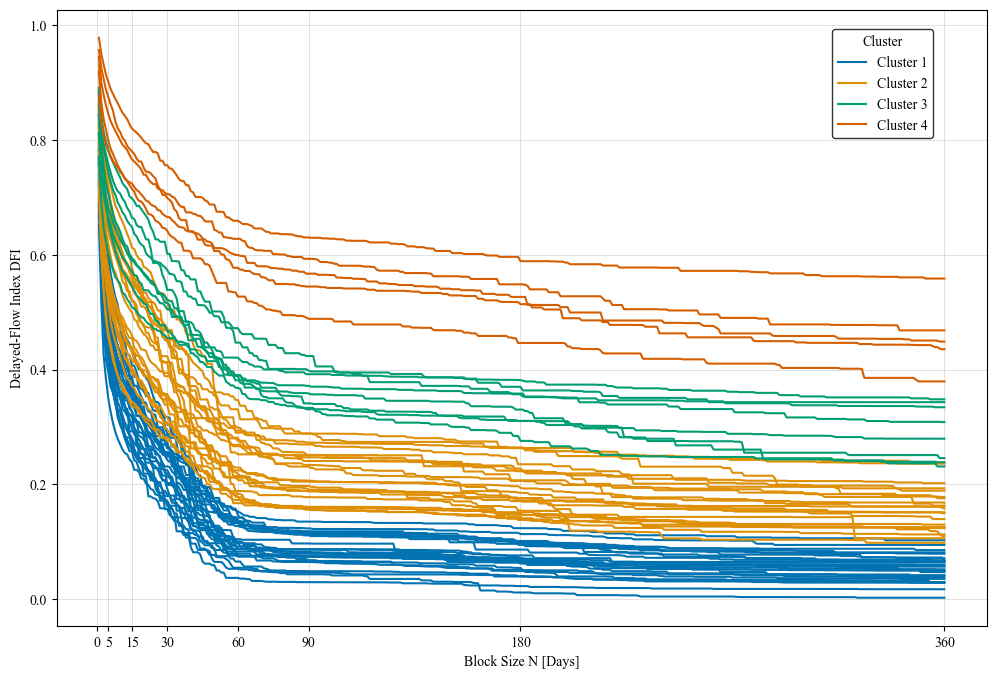

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten
file_path = r'E:\Masterarbeit_Luna_Schneider\1_daten\codes\dfi_transposed_mit_gebiet_id_cluster.xlsx'
df = pd.read_excel(file_path)

# Filtern der Daten basierend auf 'gebiet_id'
filtered_df = df[df['gebiet_id'] == 'ges_ezg']

# Festlegen der Schriftart
plt.rcParams['font.family'] = 'Times New Roman'

# Erstellen einer Farbpalette für die Clusterfarben aus der Seaborn colorblind Palette
colorblind_palette = sns.color_palette("colorblind")
selected_colors = [colorblind_palette[i] for i in [0, 1, 2, 3]]  # Blau, Orange, Grün, Rot

# Cluster Farben zuordnen
cluster_labels = sorted(filtered_df['cluster'].unique())
cluster_colors = {cluster: selected_colors[i % len(selected_colors)] for i, cluster in enumerate(cluster_labels)}

# Plot erstellen
plt.figure(figsize=(12, 8))

# Plot nach Clustern färben
for cluster in cluster_labels:
    cluster_data = filtered_df[filtered_df['cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        x = range(1, 361)  # Tage von 1 bis 360
        y = row[2:362]  # DFI-Werte
        plt.plot(x, y, color=cluster_colors[cluster], label=f'Cluster {cluster}' if f'Cluster {cluster}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Achsen und Titel festlegen
plt.title('')
plt.xlabel('Block Size N [Days]', fontsize=10)
plt.ylabel('Delayed-Flow Index DFI', fontsize=10)

# X-Achse anpassen
plt.xticks([0, 5, 15, 30, 60, 90, 180, 360], labels=['0', '5', '15', '30', '60', '90', '180', '360'])

# Legende anpassen und verschieben
legend = plt.legend(title='Cluster', frameon=True, bbox_to_anchor=(0.95, 0.98))
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

# Rasterlinien anpassen
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)

# Position der y-Achse anpassen
plt.gca().spines['left'].set_position(('axes', 0))

# Speichern der Grafik mit hoher Auflösung
plt.savefig(r'E:\Masterarbeit_Luna_Schneider\2_ergebnisse\dfi_plot_cluster.png', dpi=500) 

plt.show()




## CDCs by Cluster --> teil_ezg

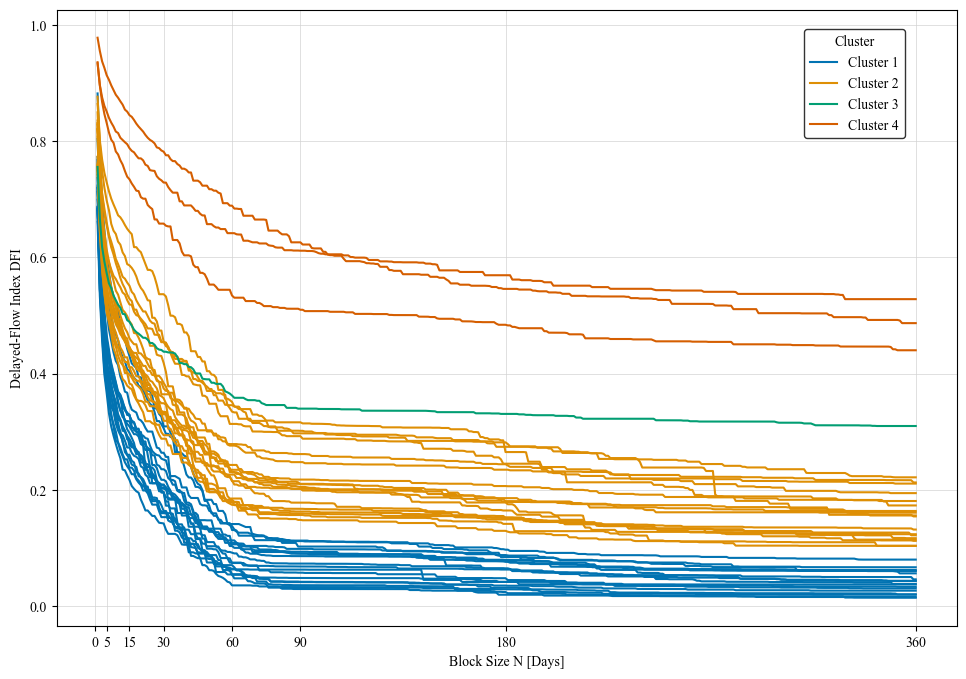

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lade die Daten
file_path = r'E:\Masterarbeit_Luna_Schneider\1_daten\codes\dfi_transposed_mit_gebiet_id_cluster.xlsx'
df = pd.read_excel(file_path)

# Filtern der Daten basierend auf 'gebiet_id'
filtered_df = df[df['gebiet_id'] == 'teil_ezg']

# Festlegen der Schriftart
plt.rcParams['font.family'] = 'Times New Roman'

# Erstellen einer Farbpalette für die Clusterfarben aus der Seaborn colorblind Palette
colorblind_palette = sns.color_palette("colorblind")
selected_colors = [colorblind_palette[i] for i in [0, 1, 2, 3]]  # Blau, Orange, Grün, Rot

# Cluster Farben zuordnen
cluster_labels = sorted(filtered_df['cluster'].unique())
cluster_colors = {cluster: selected_colors[i % len(selected_colors)] for i, cluster in enumerate(cluster_labels)}

# Plot erstellen
plt.figure(figsize=(12, 8))

# Plot nach Clustern färben
for cluster in cluster_labels:
    cluster_data = filtered_df[filtered_df['cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        x = range(1, 361)  # Tage von 1 bis 360
        y = row[2:362]  # DFI-Werte
        plt.plot(x, y, color=cluster_colors[cluster], label=f'Cluster {cluster}' if f'Cluster {cluster}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Achsen und Titel festlegen
plt.title('')
plt.xlabel('Block Size N [Days]', fontsize=10)
plt.ylabel('Delayed-Flow Index DFI', fontsize=10)

# X-Achse anpassen
plt.xticks([0, 5, 15, 30, 60, 90, 180, 360], labels=['0', '5', '15', '30', '60', '90', '180', '360'])

# Legende anpassen und verschieben
legend = plt.legend(title='Cluster', frameon=True, bbox_to_anchor=(0.95, 0.98))
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

# Rasterlinien anpassen
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)

# Position der y-Achse anpassen
plt.gca().spines['left'].set_position(('axes', 0))
# Anpassen der Abstände
plt.subplots_adjust(left=0.15)

# Speichern der Grafik mit hoher Auflösung
plt.savefig(r'E:\Masterarbeit_Luna_Schneider\2_ergebnisse\dfi_plot_cluster_teil_ezg.png', dpi=500)

plt.show()


Proof and erase NA Values

In [1]:
import pandas as pd
import os

# Verzeichnis, in dem sich die DFI-Dateien befinden
directory = "C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/1_daten/2_dfi/dfi_ergebnisse"

# Durchsuchen des Verzeichnisses und Überprüfen auf NA-Werte
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(directory, filename)
        
        # Datei laden
        df = pd.read_excel(file_path)
        
        # Überprüfen auf NA-Werte in der DFI-Spalte
        if df['dfi'].isna().any():
            print(f"Deleting file due to NA values: {filename}")
            os.remove(file_path)

print("NA values check completed and files with NA values deleted.")

NA values check completed and files with NA values deleted.


## Breakpoints Calculations

In [1]:
# Laden der notwendigen Pakete
library(readxl)
library(delayedflow)
library(openxlsx)
library(dplyr)

# Setzen des Arbeitsverzeichnisses
setwd("C:/Users/Lenovo/Documents/Masterarbeit/Masterarbeit/1_daten/2_dfi/dfi_ergebnisse")

# Verzeichnis der DFI-Dateien
dfi_files <- list.files(pattern = "dfi_.*\\.xlsx")

# Ergebnisliste initialisieren
results_list <- list()

# Funktion zur Berechnung der Breakpoints und Speicherung der Ergebnisse
process_file <- function(file) {
  # Datei einlesen
  dfi_data <- read_excel(file)
  
  # Sicherstellen, dass die DFI-Spalte vorhanden ist
  if (!"dfi" %in% colnames(dfi_data)) {
    cat("Die Spalte 'dfi' ist in der Datei", file, "nicht vorhanden.\n")
    return(NULL)
  }
  
  # Berechnung der Breakpoints
  bps <- find_bps(dfi_data$dfi, n_bp = 2)
  
  # Extrahieren der Breakpoints und relativen Beiträge
  bp1 <- bps$bps_position["bp_1"]
  bp2 <- bps$bps_position["bp_2"]
  contr1 <- bps$rel_contr["contr_1"]
  contr2 <- bps$rel_contr["contr_2"]
  contr3 <- bps$rel_contr["contr_3"]
  bias <- bps$bias
  
  # Ergebnis speichern
  result <- data.frame(
    file = file,
    bp1 = bp1,
    bp2 = bp2,
    contr1 = contr1,
    contr2 = contr2,
    contr3 = contr3,
    bias = bias
  )
  
  return(result)
}

# Alle Dateien im Verzeichnis verarbeiten
for (file in dfi_files) {
  cat("Verarbeite Datei:", file, "\n")
  result <- process_file(file)
  if (!is.null(result)) {
    results_list <- append(results_list, list(result))
  }
}

# Ergebnisse zusammenführen und speichern
results_df <- bind_rows(results_list)
write.xlsx(results_df, "breakpoints_results.xlsx")
cat("Ergebnisse wurden in 'breakpoints_results.xlsx' gespeichert.\n")


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union




Verarbeite Datei: dfi_abfluss_abentheuer.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_albisheim.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_alsdorf.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_alsdorf_oberecken.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_altenahr.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_altenbamberg.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_althornbach.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_alzey.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_argenschwang.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_bad_duerkheim.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_bengel.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss_bobenthal.xlsx 
Calculating breakpoints...Done. 

Verarbeite Datei: dfi_abfluss